# Bonus Assignment
#Mai Osama        202000746
#Wessam Tamer     202001732

# Problem

Navigating in the campus using a car to reach any building.Making the map of ZC as a grid, and each point represents pixels in the actual map
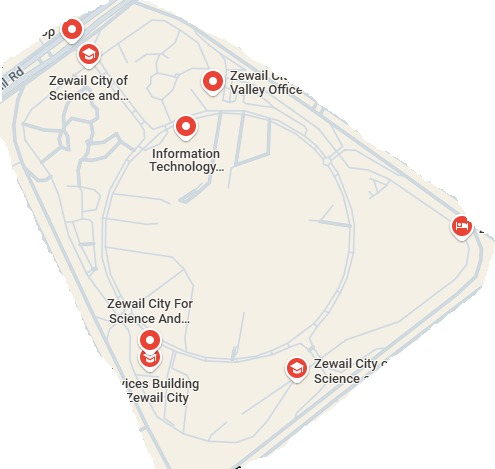

---

**Inital State:** Any place (Main Gate or any building)


---

**Goal:** The targeted place.


---
**States:** Pixels (grid's points)


---

**Actions:** Moving right, left, or forward


In [ ]:
class Problem:
    '''
    Abstract base class for problem formulation.
    It declares the expected methods to be used by a search algorithm.
    All the methods declared are just placeholders that throw errors if not overriden by child "concrete" classes!
    '''

    def __init__(self):
        '''Constructor that initializes the problem. Typically used to setup the initial state and, if applicable, the goal state.'''
        self.init_state = None

    def actions(self, state):
        '''Returns an iterable with the applicable actions to the given state.'''
        raise NotImplementedError

    def result(self, state, action):
        '''Returns the resulting state from applying the given action to the given state.'''
        raise NotImplementedError

    def goal_test(self, state):
        '''Returns whether or not the given state is a goal state.'''
        raise NotImplementedError

    def step_cost(self, state, action):
        '''Returns the step cost of applying the given action to the given state.'''
        raise NotImplementedError

In [ ]:
from collections import deque
import math
import heapq

class Node:
    def __init__(self, state, parent, action, path_cost):
        self.state = state
        self.parent = parent
        self.action = action
        self.path_cost = path_cost

    @classmethod
    def root(cls, init_state):
        return cls(init_state, None, None, 0)

    @classmethod
    def child(cls, problem, parent, action):
        return cls(
            problem.result(parent.state, action),
            parent,
            action,
            parent.path_cost + problem.step_cost(parent.state, action))

    def __lt__(self, other):
        return self.path_cost < other.path_cost


def solution(node):
    actions = []
    cost = node.path_cost
    while node.parent is not None:
        actions.append(node.action)
        node = node.parent
    actions.reverse()
    return actions, cost


def a_star_search(problem, heuristic):
    frontier = []
    heapq.heappush(frontier, (0, Node.root(problem.init_state)))
    explored = set()
    frontier_states = {problem.init_state: 0}

    while frontier:
        _, node = heapq.heappop(frontier)
        if problem.goal_test(node.state):
            return solution(node)

        explored.add(node.state)

        for action in problem.actions(node.state):
            child = Node.child(problem, node, action)
            if child.state not in explored and child.state not in frontier_states:
                priority = child.path_cost + heuristic(child.state, problem.goal_states)
                heapq.heappush(frontier, (priority, child))
                frontier_states[child.state] = child.path_cost
            elif child.state in frontier_states and frontier_states[child.state] > child.path_cost:
                priority = child.path_cost + heuristic(child.state, problem.goal_states)
                heapq.heappush(frontier, (priority, child))
                frontier_states[child.state] = child.path_cost

    return None

def manhattan_distance(state, goal_state):
    x1, y1 = state
    x2, y2 = goal_state
    distance = abs(x2 - x1) + abs(y2 - y1)
    return distance

In [ ]:
class ZC_Map(Problem):
    '''Your problem formulation.'''
    def __init__(self, init_state, goal_states, grid):
        super().__init__()
        self.init_state = init_state
        self.goal_states = goal_states
        self.grid = grid
        self.visited = set()

    def actions(self, state):
        x, y = state
        possible_actions = []
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        for dx, dy in directions:
            new_x, new_y = x + dx, y + dy
            if self.is_valid_pixel(new_x, new_y):
                possible_actions.append((new_x, new_y))
        return possible_actions

    def is_valid_pixel(self, x, y):
        '''Checks if the pixel is within bounds and gray'''
        return (0 <= x < len(self.grid) and
                0 <= y < len(self.grid[0]) and
                self.grid[x][y] == 1)  # Assuming 1 is gray (car routes), 0 is white

    def result(self, state, action):
        '''Returns the resulting state after applying the action (moving to the next pixel).'''
        return action

    def goal_test(self, state):
        '''Checks if the current state is the goal state.'''
        return state == self.goal_states

    def step_cost(self, state, action):
        x1, y1 = state
        x2, y2 = action
        distance = math.sqrt((x2 - x1)**2 + (y2 - y1)**2)
        return distance

In [ ]:
def display_grid_with_buildings(grid, buildings):
    rows = len(grid)
    cols = len(grid[0]) if rows > 0 else 0
    cell_width = 15
    display_grid = [[" " * cell_width for _ in range(cols)] for _ in range(rows)]

    for x in range(rows):
        for y in range(cols):
            cell_value = str(grid[x][y])
            building_name = ""
            for building, (bx, by) in buildings.items():
                if bx == x and by == y:
                    building_name = building
                    break
            if building_name:
                display_grid[x][y] = f"{cell_value} ({building_name})".ljust(cell_width)
            else:
                display_grid[x][y] = cell_value.ljust(cell_width)

    print("Grid with Values and Building Names:")
    for row in display_grid:
        print("|".join(row))
        print("-" * (cell_width * cols + (cols - 1)))

def display_path(grid, path, init_state, buildings):

    grid_copy = [row.copy() for row in grid]

    x, y = init_state
    grid_copy[x][y] = "S"

    current_state = init_state
    for action in path:
        x, y = action
        if grid_copy[x][y] != "S":
            grid_copy[x][y] = "*"
        current_state = action

    x, y = current_state
    grid_copy[x][y] = "G"


    for row in grid_copy:
        print(" ".join(map(str, row)))



grid = [
    [1, 0, 1, 1, 1, 0, 0],
    [1, 1, 1, 0, 0, 1, 1],
    [0, 1, 1, 1, 1, 0, 1],
    [1, 1, 1, 1, 1, 1, 1],
    [0, 0, 1, 0, 0, 1, 0]
]

buildings = {
    "MAIN_GATE": (0, 0),
    "DORM": (0, 2),
    "AB": (1, 5),
    "SB": (2, 4),
    "OB": (3, 3),
    "SB2": (4, 2),
    "NB": (3, 1),
    "HB": (2, 2)
}

display_grid_with_buildings(grid, buildings)


target_building = "HB"
goal_state = buildings[target_building]


init_state = buildings["MAIN_GATE"]


zc_map = ZC_Map(init_state, goal_state, grid)

result = a_star_search(zc_map, manhattan_distance)

if result is not None:
    actions, cost = result
    print("Path to the goal:")
    for action in actions:
        print(action)
    print("Total cost:", cost)


    print("\nVisualization of the path with all buildings:")
    display_path(grid, actions, init_state, buildings)
else:
    print("No path found to the goal.")

Grid with Values and Building Names:
1 (MAIN_GATE)  |0              |1 (DORM)       |1              |1              |0              |0              
---------------------------------------------------------------------------------------------------------------
1              |1              |1              |0              |0              |1 (AB)         |1              
---------------------------------------------------------------------------------------------------------------
0              |1              |1 (HB)         |1              |1 (SB)         |0              |1              
---------------------------------------------------------------------------------------------------------------
1              |1 (NB)         |1              |1 (OB)         |1              |1              |1              
---------------------------------------------------------------------------------------------------------------
0              |0              |1 (SB2)        |0              |0  